<a href="https://www.kaggle.com/code/kapturovalexander/kapturov-s-playground-series-s3-e11?scriptVersionId=162282097" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/playground-series-s3e11/sample_submission.csv
/kaggle/input/playground-series-s3e11/train.csv
/kaggle/input/playground-series-s3e11/test.csv


![](https://www.kaggle.com/competitions/47790/images/header)

# <span style="color: Crimson;">Playground Series - Season 3, Episode 11</span>
## <span style="color: purple;">Tabular Regression with a Media Campaign Cost Dataset</span>

### <span style="color: blue;">Welcome to the 2023 edition of Kaggle's Playground Series!</span>
Thank you to everyone who participated in and contributed to Season 3 Playground Series so far!

With the same goal to give the Kaggle community a variety of fairly light-weight challenges that can be used to learn and sharpen skills in different aspects of machine learning and data science, we will continue launching the Tabular Tuesday in March every Tuesday 00:00 UTC, with each competition running for 2 weeks. Again, these will be fairly light-weight datasets that are synthetically generated from real-world data, and will provide an opportunity to quickly iterate through various model and feature engineering ideas, create visualizations, etc..

### <span style="color: blue;">Synthetically-Generated Datasets</span>
Using synthetic data for Playground competitions allows us to strike a balance between having real-world data (with named features) and ensuring test labels are not publicly available. This allows us to host competitions with more interesting datasets than in the past. While there are still challenges with synthetic data generation, the state-of-the-art is much better now than when we started the Tabular Playground Series two years ago, and that goal is to produce datasets that have far fewer artifacts. Please feel free to give us feedback on the datasets for the different competitions so that we can continue to improve!

#### <span style="color: lime">Synthetically-Generated Datasets</span>
Root Mean Squared Log Error (RMLSE)
Submissions are scored on the root mean squared log error (RMSLE) (the sklearn mean_squared_log_error with squared=False).

#### <span style="color: lime">Synthetically-Generated Datasets</span>
Submission File
For each id in the test set, you must predict the value for the target cost. The file should contain a header and have the following format:

```Python
id,cost
360336,99.615
360337,87.203
360338,101.111
etc.
```

**Start Date** - March 20, 2023

**Entry Deadline** - Same as the Final Submission Deadline

**Team Merger Deadline** - Same as the Final Submission Deadline

**Final Submission Deadline** - April 3, 2023

All deadlines are at 11:59 PM UTC on the corresponding day unless otherwise noted. The competition organizers reserve the right to update the contest timeline if they deem it necessary.

# <span style="color: purple">1 - import the necessary libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_log_error, r2_score
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from mlxtend.regressor import StackingRegressor

# <span style="color: purple">2 - open training and test data

In [3]:
train = pd.read_csv('/kaggle/input/playground-series-s3e11/train.csv')
test = pd.read_csv('/kaggle/input/playground-series-s3e11/test.csv')
train.head(3)

,id,store_sales(in millions),unit_sales(in millions),total_children,num_children_at_home,avg_cars_at home(approx).1,gross_weight,recyclable_package,low_fat,units_per_case,store_sqft,coffee_bar,video_store,salad_bar,prepared_food,florist,cost
0,0,8.61,3.0,2.0,2.0,2.0,10.30,1.0,0.0,32.0,36509.0,0.0,0.0,0.0,0.0,0.0,62.09
1,1,5.00,2.0,4.0,0.0,3.0,6.66,1.0,0.0,1.0,28206.0,1.0,0.0,0.0,0.0,0.0,121.80
2,2,14.08,4.0,0.0,0.0,3.0,21.30,1.0,0.0,26.0,21215.0,1.0,0.0,0.0,0.0,0.0,83.51


# <span style="color: purple">3 - display descriptive statistics of training data

In [4]:
train.describe()

,id,store_sales(in millions),unit_sales(in millions),total_children,num_children_at_home,avg_cars_at home(approx).1,gross_weight,recyclable_package,low_fat,units_per_case,store_sqft,coffee_bar,video_store,salad_bar,prepared_food,florist,cost
count,360336.000000,360336.000000,360336.000000,360336.000000,360336.000000,360336.000000,360336.000000,360336.000000,360336.000000,360336.000000,360336.000000,360336.000000,360336.000000,360336.000000,360336.000000,360336.000000,360336.000000
mean,180167.500000,6.337376,3.043881,2.456482,0.689390,2.203813,13.822071,0.568086,0.327797,18.972706,28180.333442,0.564839,0.277394,0.504807,0.504832,0.503191,99.614729
std,104020.187637,3.307980,0.784676,1.488992,1.214732,1.084293,4.614792,0.495343,0.469411,10.212912,5968.874074,0.495779,0.447713,0.499978,0.499977,0.499991,29.939435
min,0.000000,0.510000,1.000000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,1.000000,20319.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.790000
25%,90083.750000,3.720000,3.000000,1.000000,0.000000,1.000000,9.710000,0.000000,0.000000,10.000000,23593.000000,0.000000,0.000000,0.000000,0.000000,0.000000,70.320000
50%,180167.500000,5.780000,3.000000,2.000000,0.000000,2.000000,13.600000,1.000000,0.000000,20.000000,27694.000000,1.000000,0.000000,1.000000,1.000000,1.000000,98.810000
75%,270251.250000,8.400000,4.000000,4.000000,1.000000,3.000000,17.700000,1.000000,1.000000,28.000000,33858.000000,1.000000,1.000000,1.000000,1.000000,1.000000,126.620000
max,360335.000000,22.920000,6.000000,5.000000,5.000000,4.000000,21.900000,1.000000,1.000000,36.000000,39696.000000,1.000000,1.000000,1.000000,1.000000,1.000000,149.750000


# <span style="color: purple">4 - look at the number of gaps in the training set

In [5]:
train.isna().sum()  # as you can see the number of passes is 0

id                            0
store_sales(in millions)      0
unit_sales(in millions)       0
total_children                0
num_children_at_home          0
avg_cars_at home(approx).1    0
gross_weight                  0
recyclable_package            0
low_fat                       0
units_per_case                0
store_sqft                    0
coffee_bar                    0
video_store                   0
salad_bar                     0
prepared_food                 0
florist                       0
cost                          0
dtype: int64

# <span style="color: purple">5 - look at the number of gaps in the test set

In [6]:
test.isna().sum()  # As you can see the number of passes is 0

id                            0
store_sales(in millions)      0
unit_sales(in millions)       0
total_children                0
num_children_at_home          0
avg_cars_at home(approx).1    0
gross_weight                  0
recyclable_package            0
low_fat                       0
units_per_case                0
store_sqft                    0
coffee_bar                    0
video_store                   0
salad_bar                     0
prepared_food                 0
florist                       0
dtype: int64

# <span style="color: purple">6 - look at the data type of the training set

In [7]:
train.info()  # All data is of type float64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 360336 entries, 0 to 360335
Data columns (total 17 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   id                          360336 non-null  int64  
 1   store_sales(in millions)    360336 non-null  float64
 2   unit_sales(in millions)     360336 non-null  float64
 3   total_children              360336 non-null  float64
 4   num_children_at_home        360336 non-null  float64
 5   avg_cars_at home(approx).1  360336 non-null  float64
 6   gross_weight                360336 non-null  float64
 7   recyclable_package          360336 non-null  float64
 8   low_fat                     360336 non-null  float64
 9   units_per_case              360336 non-null  float64
 10  store_sqft                  360336 non-null  float64
 11  coffee_bar                  360336 non-null  float64
 12  video_store                 360336 non-null  float64
 13  salad_bar     

# <span style="color: purple">7 - Display histograms of distribution

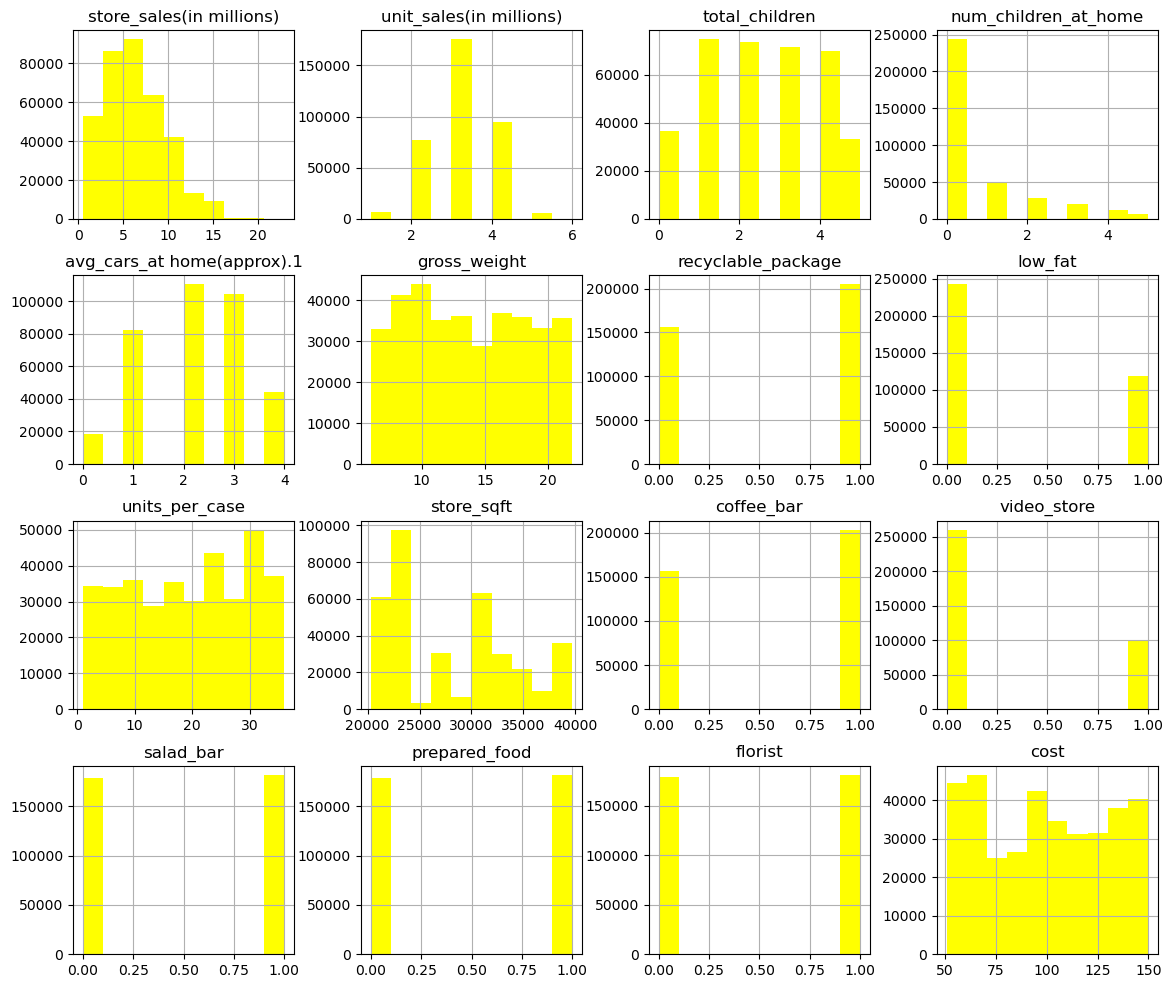

In [8]:
train.drop('id', axis=1).hist(figsize=(14, 12), color='yellow');

# <span style="color: purple">8 - Create boxplots of our features

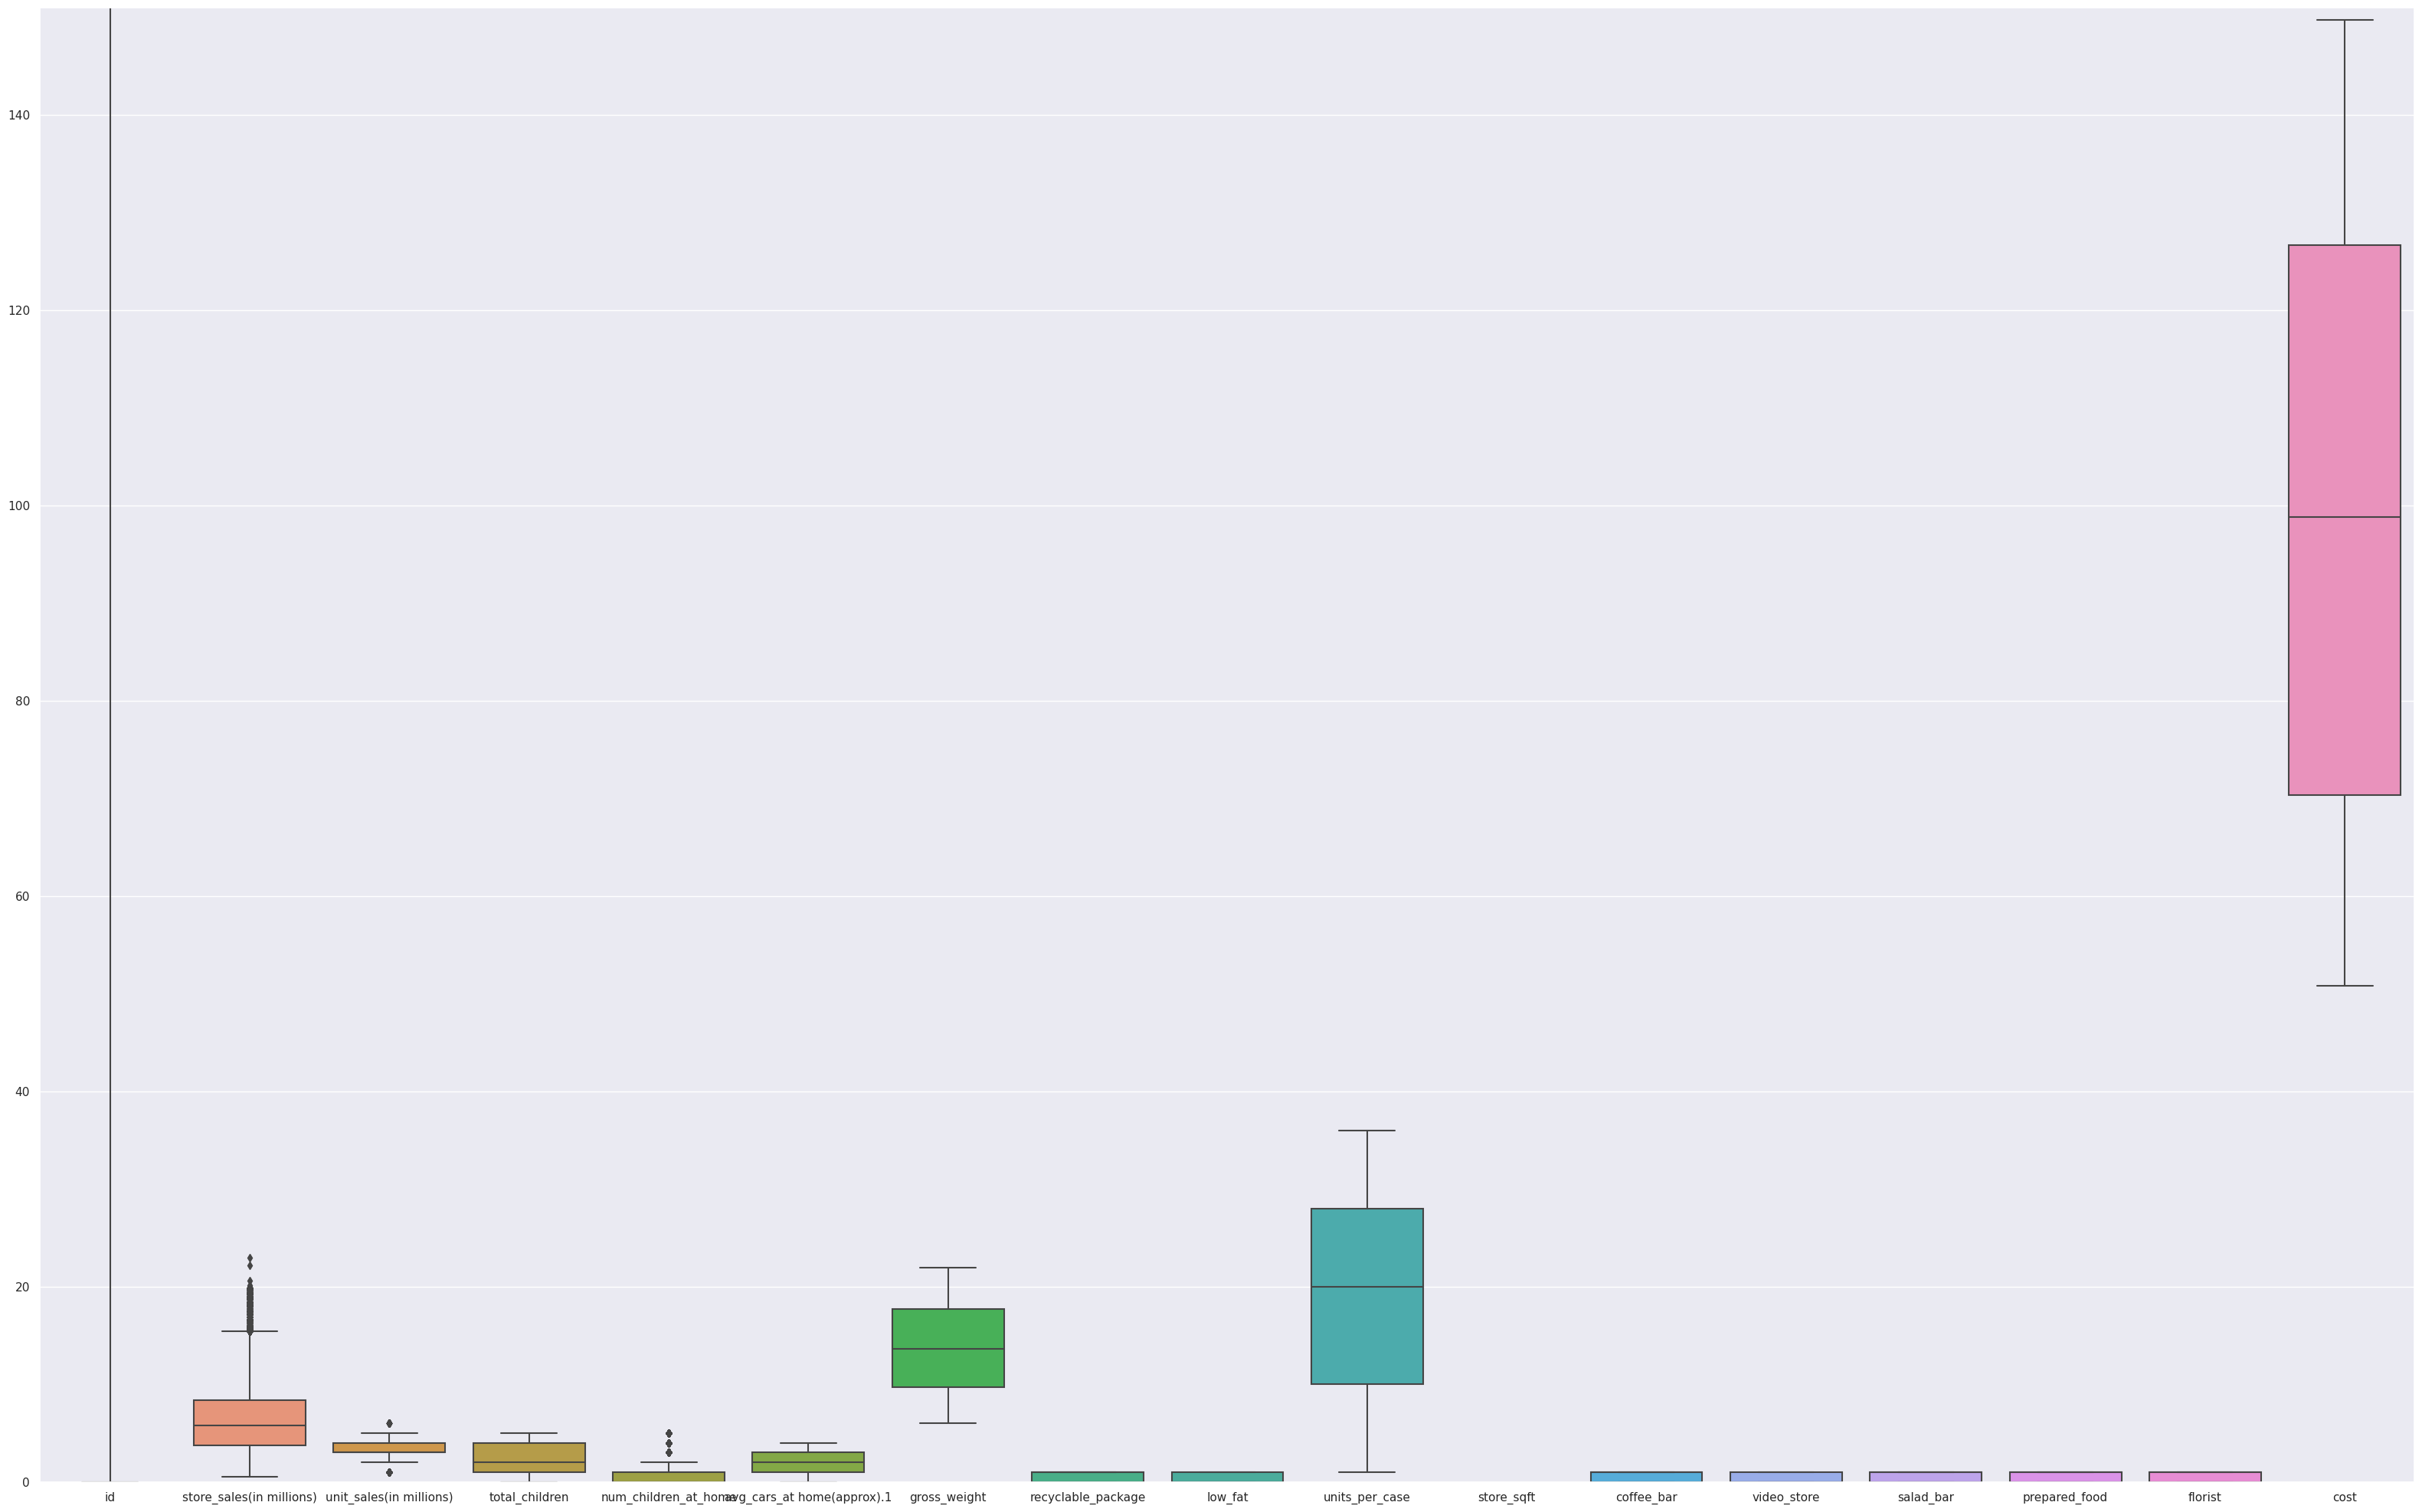

In [9]:
sns.set(rc={'figure.figsize': (40, 25)})
sns.boxplot(train)
plt.ylim([0, 151]);

# <span style="color: purple">9 - look at the correlation between features

In [10]:
correlation = train.corr()
correlation.style.background_gradient(cmap='PuRd')

,id,store_sales(in millions),unit_sales(in millions),total_children,num_children_at_home,avg_cars_at home(approx).1,gross_weight,recyclable_package,low_fat,units_per_case,store_sqft,coffee_bar,video_store,salad_bar,prepared_food,florist,cost
id,1.000000,0.001750,0.000586,0.003260,0.001695,0.003257,0.001178,0.000276,0.000735,0.000496,0.000071,-0.001613,-0.002796,-0.002218,-0.002217,-0.003533,-0.000611
store_sales(in millions),0.001750,1.000000,0.481376,0.069303,0.029261,0.006794,0.038159,0.030390,-0.008735,-0.009893,0.021572,-0.040039,0.029564,0.044832,0.044854,0.046472,-0.012387
unit_sales(in millions),0.000586,0.481376,1.000000,0.113231,0.046755,0.017119,0.000467,0.001074,-0.003663,0.001141,0.045540,-0.076967,0.053795,0.082445,0.082485,0.083062,-0.026509
total_children,0.003260,0.069303,0.113231,1.000000,0.359207,0.078519,-0.000908,0.002236,-0.001597,-0.000267,-0.008991,-0.006476,-0.013303,-0.023564,-0.023560,-0.012545,-0.007482
num_children_at_home,0.001695,0.029261,0.046755,0.359207,1.000000,0.115476,-0.000601,0.006104,-0.000208,-0.004174,0.005785,-0.023234,-0.020738,-0.031109,-0.031050,-0.017888,-0.001727
avg_cars_at home(approx).1,0.003257,0.006794,0.017119,0.078519,0.115476,1.000000,-0.002267,0.004021,-0.001912,0.001190,-0.020032,-0.000441,0.012702,-0.013102,-0.013035,-0.004284,0.027098
gross_weight,0.001178,0.038159,0.000467,-0.000908,-0.000601,-0.002267,1.000000,0.059050,-0.033421,-0.017609,-0.000455,0.000835,-0.000845,0.002116,0.002155,0.000764,-0.000116
recyclable_package,0.000276,0.030390,0.001074,0.002236,0.006104,0.004021,0.059050,1.000000,-0.030025,-0.003028,-0.000343,0.004037,0.004129,0.004674,0.004672,0.004849,-0.001455
low_fat,0.000735,-0.008735,-0.003663,-0.001597,-0.000208,-0.001912,-0.033421,-0.030025,1.000000,0.030226,0.001972,0.002622,0.002893,0.005602,0.005567,0.005540,-0.001975
units_per_case,0.000496,-0.009893,0.001141,-0.000267,-0.004174,0.001190,-0.017609,-0.003028,0.030226,1.000000,0.002297,0.000828,0.000569,0.001698,0.001699,0.000556,0.000180


### <span style="color: green;">Features salad_bar and prepared_food have a very high correlation (about 1). To avoid multicollinearity, remove the prepared_food feature</span>

# <span style="color: purple">10 - remove the feature 'prepared_food'

In [11]:
train.drop(columns='prepared_food', axis=1, inplace=True)
test.drop(columns='prepared_food', axis=1, inplace=True)

# <span style="color: purple">11 - checking the correlation after removing the feature 'prepared_food'

In [12]:
correlation = train.corr()
correlation.style.background_gradient(cmap='Blues')

,id,store_sales(in millions),unit_sales(in millions),total_children,num_children_at_home,avg_cars_at home(approx).1,gross_weight,recyclable_package,low_fat,units_per_case,store_sqft,coffee_bar,video_store,salad_bar,florist,cost
id,1.000000,0.001750,0.000586,0.003260,0.001695,0.003257,0.001178,0.000276,0.000735,0.000496,0.000071,-0.001613,-0.002796,-0.002218,-0.003533,-0.000611
store_sales(in millions),0.001750,1.000000,0.481376,0.069303,0.029261,0.006794,0.038159,0.030390,-0.008735,-0.009893,0.021572,-0.040039,0.029564,0.044832,0.046472,-0.012387
unit_sales(in millions),0.000586,0.481376,1.000000,0.113231,0.046755,0.017119,0.000467,0.001074,-0.003663,0.001141,0.045540,-0.076967,0.053795,0.082445,0.083062,-0.026509
total_children,0.003260,0.069303,0.113231,1.000000,0.359207,0.078519,-0.000908,0.002236,-0.001597,-0.000267,-0.008991,-0.006476,-0.013303,-0.023564,-0.012545,-0.007482
num_children_at_home,0.001695,0.029261,0.046755,0.359207,1.000000,0.115476,-0.000601,0.006104,-0.000208,-0.004174,0.005785,-0.023234,-0.020738,-0.031109,-0.017888,-0.001727
avg_cars_at home(approx).1,0.003257,0.006794,0.017119,0.078519,0.115476,1.000000,-0.002267,0.004021,-0.001912,0.001190,-0.020032,-0.000441,0.012702,-0.013102,-0.004284,0.027098
gross_weight,0.001178,0.038159,0.000467,-0.000908,-0.000601,-0.002267,1.000000,0.059050,-0.033421,-0.017609,-0.000455,0.000835,-0.000845,0.002116,0.000764,-0.000116
recyclable_package,0.000276,0.030390,0.001074,0.002236,0.006104,0.004021,0.059050,1.000000,-0.030025,-0.003028,-0.000343,0.004037,0.004129,0.004674,0.004849,-0.001455
low_fat,0.000735,-0.008735,-0.003663,-0.001597,-0.000208,-0.001912,-0.033421,-0.030025,1.000000,0.030226,0.001972,0.002622,0.002893,0.005602,0.005540,-0.001975
units_per_case,0.000496,-0.009893,0.001141,-0.000267,-0.004174,0.001190,-0.017609,-0.003028,0.030226,1.000000,0.002297,0.000828,0.000569,0.001698,0.000556,0.000180


### <span style='color: green'>Features with a high correlation (more than 0.62) are no longer left</span>

# <span style="color: purple">12 - look at the distribution of the dependent variable using kernel density estimation

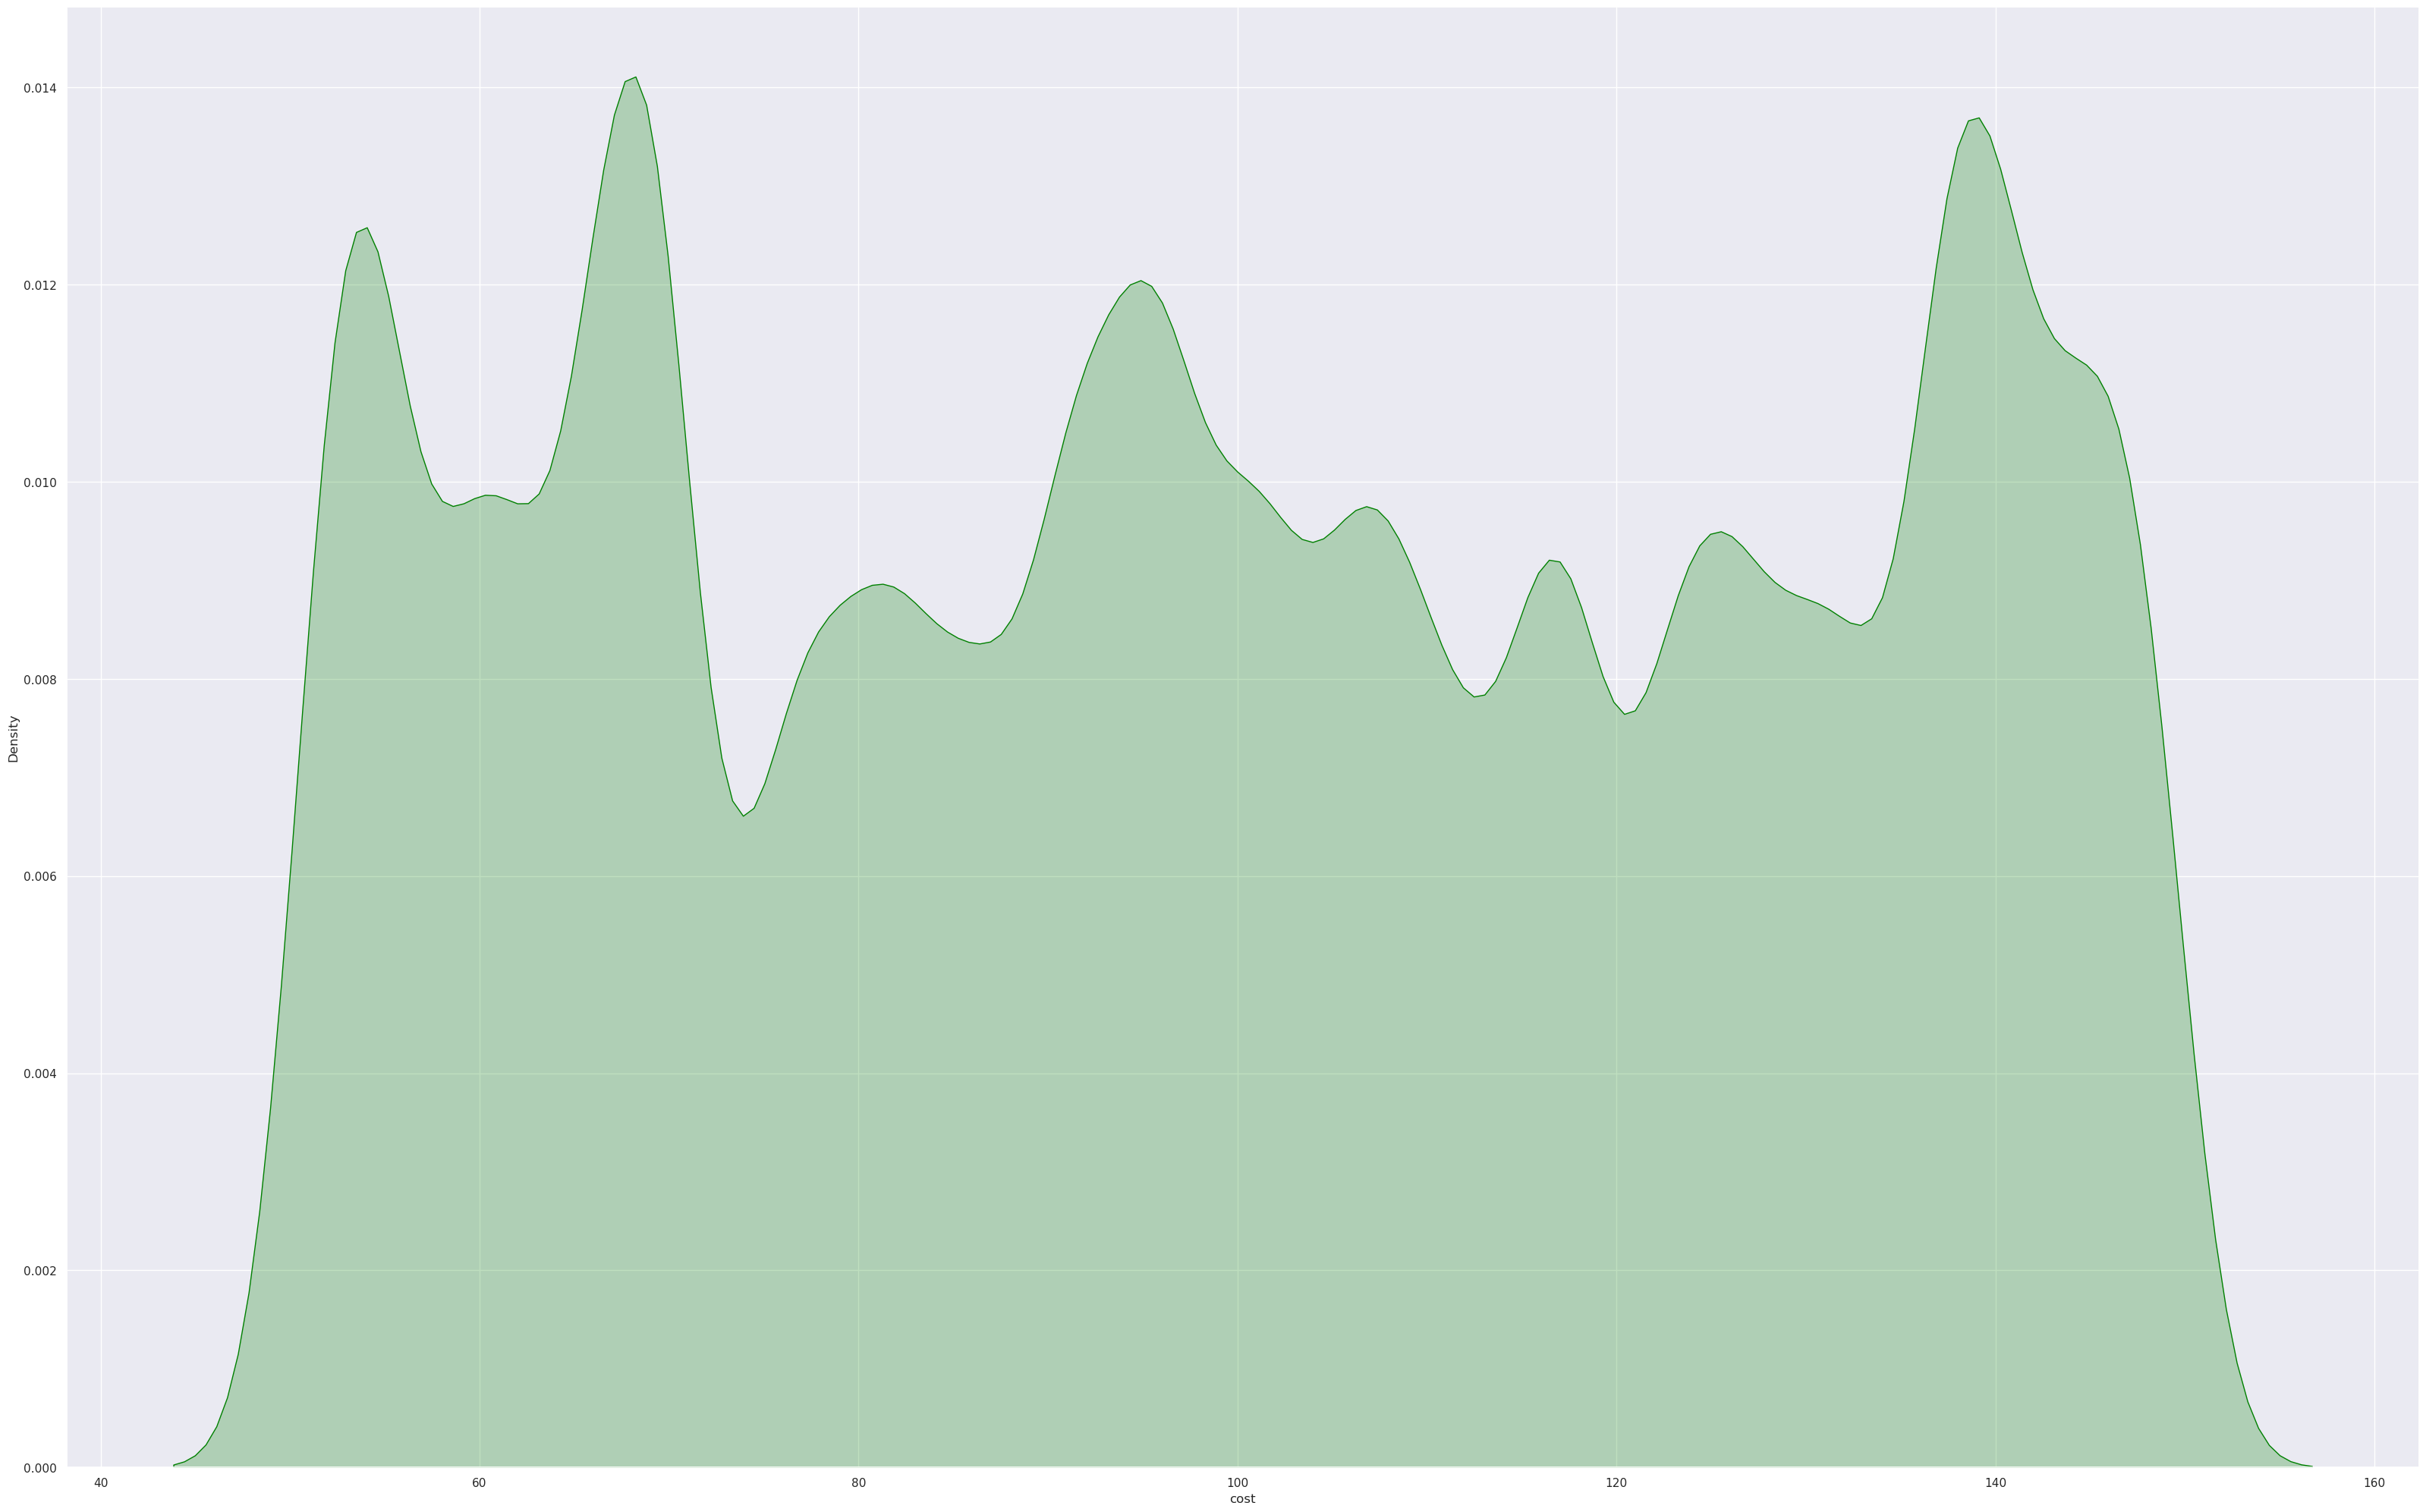

In [13]:
sns.kdeplot(train.cost, fill=True, color='green');

# <span style="color: purple">13 - look at the distribution of the dependent variable using a histogram of the distribution

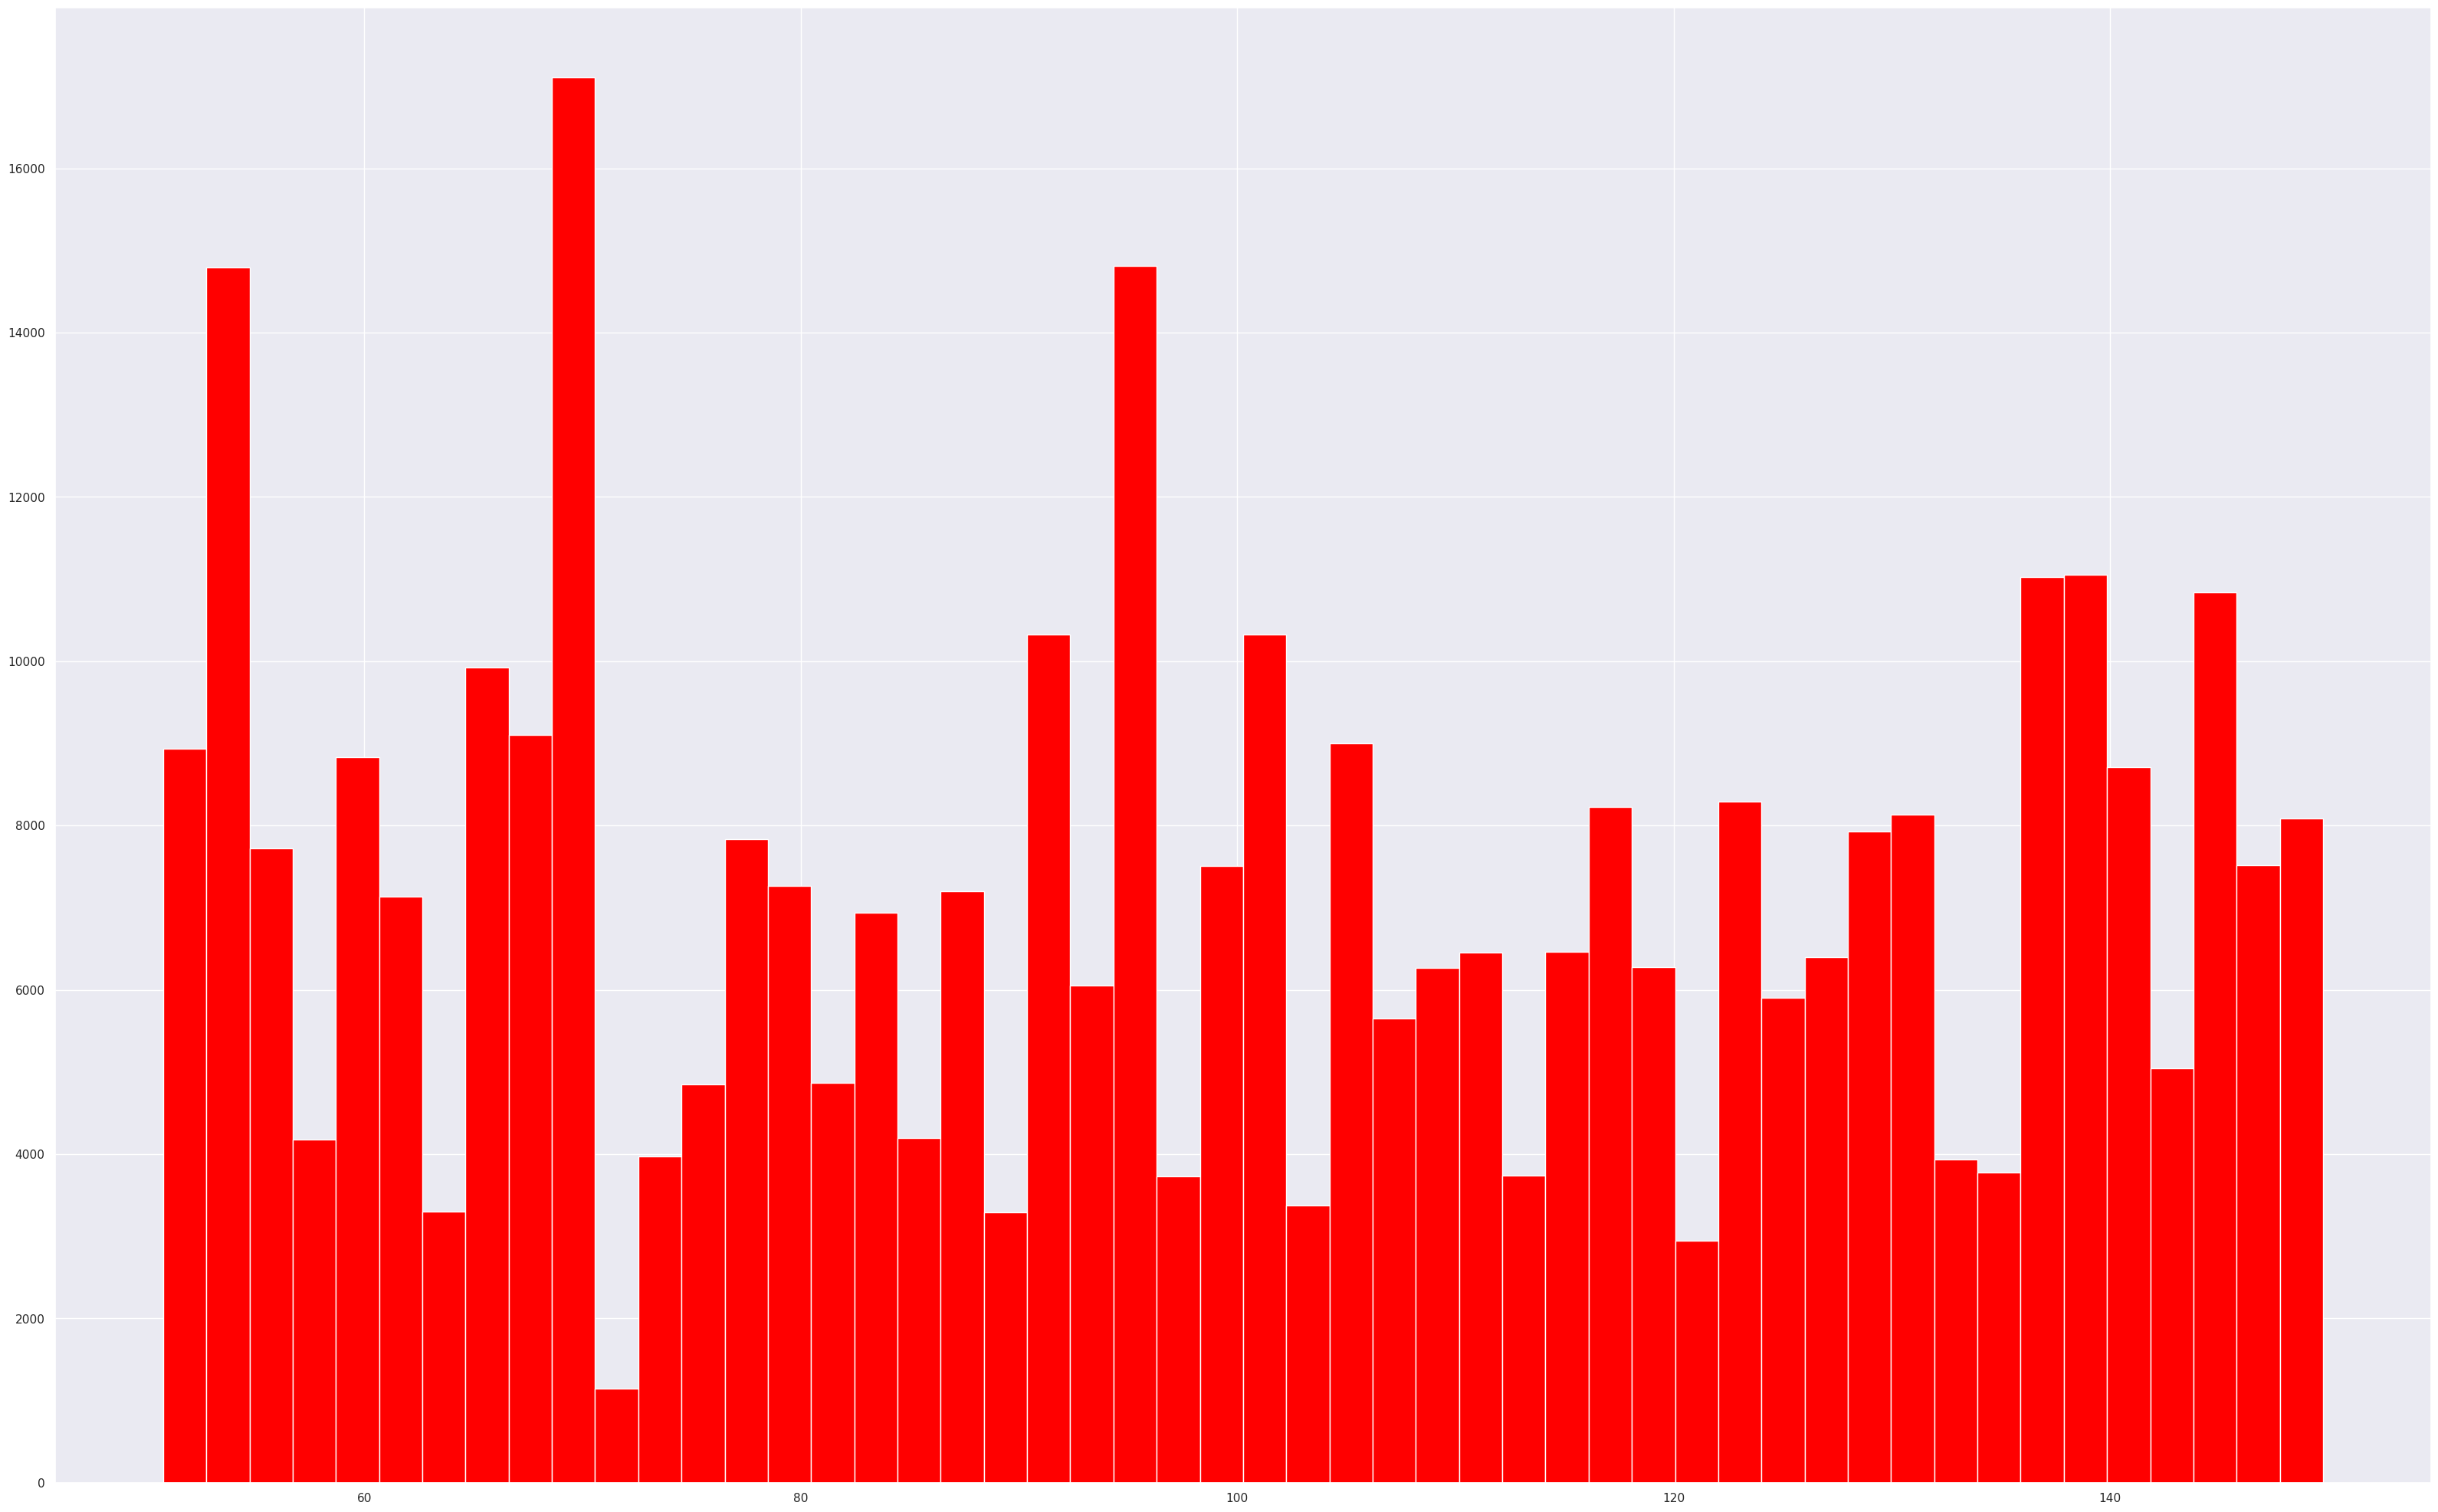

In [14]:
train['cost'].hist(bins=50, color='red');

# <span style="color: purple">14 - use the Shapiro-Wilk test to check the distribution of 'cost' for normality (ignore warnings)

In [15]:
import warnings
import scipy.stats as stats

warnings.filterwarnings('ignore')
result = stats.shapiro(train['cost'])
print(f'Shapiro-Wilk test statistic: {result[0]:.4f}')
print(f'p-value: {result[1]}')

Shapiro-Wilk test statistic: 0.9443
p-value: 0.0


### <span style="color: green">If p-value > 0.05, then we can accept the hypothesis of normal distribution. Otherwise, the hypothesis is rejected and the feature is not normally distributed.</span>
### <span style="color: green">In our case, the distribution is not normal, because p-value is 0.</span>

# <span style="color: purple">15 - To check if the distribution is normal, you can also use the Anderson-Darling test, which is more powerful than the Shapiro-Wilk test.

In [16]:
result = stats.anderson(train['cost'], dist='norm')
print(f'Anderson-Darling test statistic: {result[0]:.4f}')
print(f'critical values: {result[1]}')
print(f'Significance levels: {result[2]}')

Anderson-Darling test statistic: 5152.4337
critical values: [0.576 0.656 0.787 0.918 1.092]
Significance levels: [15.  10.   5.   2.5  1. ]


### <span style="color: green">If the value of the test statistic is less than the critical value, then the hypothesis of normal distribution can be accepted. If the value of the statistic is greater, then the hypothesis is rejected, and the feature is not normally distributed.</span>

### <span style="color: green">In our case, the distribution is not normal</span>

# <span style="color: purple">16 - split the training dataset into X and y

In [17]:
X = train.drop(columns=['cost'], axis=1)
y = train.cost

X_train, X_val, y_train, y_val = train_test_split(X, y, random_state=42)

# <span style="color: purple">17 - Standardizing data

In [18]:
sc = StandardScaler()
train_std = sc.fit_transform(X_train)
val_std = sc.transform(X_val)
test_std = sc.transform(test)

# <span style="color: purple">18 - train a Linear regression model and look at the metrics

In [19]:
lin_reg = LinearRegression().fit(train_std, y_train)
predict = lin_reg.predict(val_std)
print(f'mean_absolute_error: {mean_absolute_error(y_val, predict):.4f}')
print(f'mean_squared_error: {mean_squared_error(y_val, predict):.4f}')
print(f'mean_squared_log_error: {mean_squared_log_error(y_val, predict):.4f}')
print(f'r2_score: {r2_score(y_val, predict):.4f}')
predict

mean_absolute_error: 25.5895
mean_squared_error: 879.2209
mean_squared_log_error: 0.1007
r2_score: 0.0208


array([100.18007987,  98.5087277 ,  99.75765642, ...,  94.87985728,
        95.64755027,  93.46542468])

# <span style="color: purple">19 - train a XGB regression model and look at the metrics

In [20]:
xgb_reg = XGBRegressor().fit(train_std, y_train)
predict = xgb_reg.predict(val_std)
print(f'mean_absolute_error: {mean_absolute_error(y_val, predict):.4f}')
print(f'mean_squared_error: {mean_squared_error(y_val, predict):.4f}')
print(f'mean_squared_log_error: {mean_squared_log_error(y_val, predict):.4f}')
print(f'r2_score: {r2_score(y_val, predict):.4f}')
predict

mean_absolute_error: 24.1999
mean_squared_error: 803.7558
mean_squared_log_error: 0.0919
r2_score: 0.1048


array([114.37969 ,  94.3162  ,  96.71344 , ...,  91.78302 ,  92.534676,
       103.39349 ], dtype=float32)

# <span style="color: purple">20 - initialize the models and train on the training set

In [21]:
model1 = LinearRegression()
model2 = CatBoostRegressor(random_state=42)
model3 = XGBRegressor(random_state=42)
model4 = LGBMRegressor(random_state=42)

model1.fit(train_std, y_train)
model2.fit(train_std, y_train)
model3.fit(train_std, y_train)
model4.fit(train_std, y_train)

# create an ensemble of models and predict on a test set
ensemble = StackingRegressor(regressors=[model1, model2, model3, model4],
                             meta_regressor=XGBRegressor(n_estimators=100, random_state=42))
ensemble.fit(train_std, y_train)

# evaluate the accuracy of predictions on a test set
predict = ensemble.predict(val_std)
print(f'mean_absolute_error: {mean_absolute_error(y_val, predict):.4f}')
print(f'mean_squared_error: {mean_squared_error(y_val, predict):.4f}')
print(f'mean_squared_log_error: {mean_squared_log_error(y_val, predict):.4f}')
print(f'r2_score: {r2_score(y_val, predict):.4f}')
predict

Learning rate set to 0.099174
0:	learn: 29.7829144	total: 99.1ms	remaining: 1m 39s
1:	learn: 29.6730156	total: 136ms	remaining: 1m 7s
2:	learn: 29.5707299	total: 174ms	remaining: 57.9s
3:	learn: 29.4961673	total: 205ms	remaining: 51.1s
4:	learn: 29.4253558	total: 238ms	remaining: 47.3s
5:	learn: 29.3729736	total: 267ms	remaining: 44.3s
6:	learn: 29.3282886	total: 300ms	remaining: 42.6s
7:	learn: 29.2890681	total: 330ms	remaining: 40.9s
8:	learn: 29.2557896	total: 359ms	remaining: 39.5s
9:	learn: 29.2284354	total: 390ms	remaining: 38.6s
10:	learn: 29.2076117	total: 419ms	remaining: 37.6s
11:	learn: 29.1832078	total: 449ms	remaining: 36.9s
12:	learn: 29.1633035	total: 479ms	remaining: 36.4s
13:	learn: 29.1463052	total: 505ms	remaining: 35.6s
14:	learn: 29.1281812	total: 535ms	remaining: 35.1s
15:	learn: 29.1118638	total: 564ms	remaining: 34.7s
16:	learn: 29.0856134	total: 595ms	remaining: 34.4s
17:	learn: 29.0633181	total: 625ms	remaining: 34.1s
18:	learn: 29.0507458	total: 650ms	remaini

array([132.45299,  88.90075,  88.69712, ...,  93.27754,  93.84988,
       102.37178], dtype=float32)

# <span style="color: purple">21 - train random forest regression model and look at the metrics

In [22]:
reg_randfor = RandomForestRegressor(max_depth=5, random_state=42)
reg_randfor.fit(train_std, y_train)
predict = reg_randfor.predict(val_std)
print(f'mean_absolute_error: {mean_absolute_error(y_val, predict):.4f}')
print(f'mean_squared_error: {mean_squared_error(y_val, predict):.4f}')
print(f'mean_squared_log_error: {mean_squared_log_error(y_val, predict):.4f}')
print(f'r2_score: {r2_score(y_val, predict):.4f}')
predict

mean_absolute_error: 24.9705
mean_squared_error: 841.3460
mean_squared_log_error: 0.0961
r2_score: 0.0630


array([ 99.81183859,  97.36551125,  97.80631593, ...,  90.70480664,
        94.54596956, 103.86878721])

# <span style="color: purple">22 - train a Catboost regression model and look at the metrics

In [23]:
cat = CatBoostRegressor()
cat.fit(train_std, y_train)
predict = cat.predict(val_std)

print(f'mean_absolute_error: {mean_absolute_error(y_val, predict):.4f}')
print(f'mean_squared_error: {mean_squared_error(y_val, predict):.4f}')
print(f'mean_squared_log_error: {mean_squared_log_error(y_val, predict):.4f}')
print(f'r2_score: {r2_score(y_val, predict):.4f}')
predict

Learning rate set to 0.099174
0:	learn: 29.8031348	total: 39.2ms	remaining: 39.1s
1:	learn: 29.6767380	total: 72.3ms	remaining: 36.1s
2:	learn: 29.5796643	total: 104ms	remaining: 34.5s
3:	learn: 29.5001683	total: 137ms	remaining: 34.1s
4:	learn: 29.4295639	total: 170ms	remaining: 33.9s
5:	learn: 29.3815331	total: 202ms	remaining: 33.4s
6:	learn: 29.3341331	total: 232ms	remaining: 32.9s
7:	learn: 29.2940579	total: 264ms	remaining: 32.7s
8:	learn: 29.2636467	total: 291ms	remaining: 32.1s
9:	learn: 29.2308081	total: 321ms	remaining: 31.8s
10:	learn: 29.2012999	total: 349ms	remaining: 31.3s
11:	learn: 29.1807932	total: 377ms	remaining: 31s
12:	learn: 29.1537365	total: 411ms	remaining: 31.2s
13:	learn: 29.1321439	total: 441ms	remaining: 31.1s
14:	learn: 29.1126862	total: 468ms	remaining: 30.8s
15:	learn: 29.0970980	total: 497ms	remaining: 30.6s
16:	learn: 29.0824651	total: 525ms	remaining: 30.3s
17:	learn: 29.0664500	total: 550ms	remaining: 30s
18:	learn: 29.0467184	total: 580ms	remaining: 

array([118.69206503,  93.96115783,  95.77157119, ...,  91.41524926,
        91.38787269, 102.81677996])

# <span style="color: purple">23 - the best submit result was shown by the catboost model. Let's train a test sample on it

In [24]:
cat = CatBoostRegressor()
cat.fit(train_std, y_train)
cat_predict = cat.predict(test_std)
cat_predict

Learning rate set to 0.099174
0:	learn: 29.8031348	total: 38ms	remaining: 38s
1:	learn: 29.6767380	total: 71.9ms	remaining: 35.9s
2:	learn: 29.5796643	total: 109ms	remaining: 36.3s
3:	learn: 29.5001683	total: 145ms	remaining: 36s
4:	learn: 29.4295639	total: 179ms	remaining: 35.7s
5:	learn: 29.3815331	total: 209ms	remaining: 34.6s
6:	learn: 29.3341331	total: 239ms	remaining: 33.9s
7:	learn: 29.2940579	total: 272ms	remaining: 33.7s
8:	learn: 29.2636467	total: 300ms	remaining: 33s
9:	learn: 29.2308081	total: 330ms	remaining: 32.7s
10:	learn: 29.2012999	total: 358ms	remaining: 32.2s
11:	learn: 29.1807932	total: 388ms	remaining: 32s
12:	learn: 29.1537365	total: 424ms	remaining: 32.2s
13:	learn: 29.1321439	total: 458ms	remaining: 32.3s
14:	learn: 29.1126862	total: 486ms	remaining: 31.9s
15:	learn: 29.0970980	total: 515ms	remaining: 31.7s
16:	learn: 29.0824651	total: 552ms	remaining: 31.9s
17:	learn: 29.0664500	total: 589ms	remaining: 32.1s
18:	learn: 29.0467184	total: 652ms	remaining: 33.7s


array([ 94.46045095,  95.19135081, 100.24735184, ...,  99.09302288,
       107.36506979, 101.19679597])

# <span style="color: purple">24 - making submission's dataset

In [25]:
submission = pd.DataFrame()
submission['id'] = test.id
submission['cost'] = cat_predict
submission

,id,cost
0,360336,94.460451
1,360337,95.191351
2,360338,100.247352
3,360339,108.450982
4,360340,93.130100
...,...,...
240219,600555,102.538854
240220,600556,89.554371
240221,600557,99.093023
240222,600558,107.365070


# <span style="color: purple">25 - making submission's csv file

In [26]:
submission[['id', 'cost']].to_csv('CatReg submission PSs3e11.csv', index=False)

![](https://solarsystem.nasa.gov/rails/active_storage/blobs/eyJfcmFpbHMiOnsibWVzc2FnZSI6IkJBaHBBamRTIiwiZXhwIjpudWxsLCJwdXIiOiJibG9iX2lkIn19--8f58db6031cb325cfbaf366a330cf78148c0444a/Sun.png?disposition=attachment)

# <span style='color: orange'>Have a nice day!</span>